LOAN DEFAULT PREDICTION MODEL PROJECT DOCUMENTATION

GROUP NUMBER: 8

ACTIVE  GROUP MEMBERS 

NAME    EMAIL ADDRESS

Umar Muhammed Abubakar	Aniekanetimudo@gmail.com

Aniekan Etim Udo	Aniekanetimudo@gmail.com

Ajevwarue Theophilus 	theolove1996@gmail.com


In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# importing dataset
loans = pd.read_csv("hmeq_Loan_Default.csv")

# Displaying first five items
loans.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
# Getting basic information of the data
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


The loans dataset contains 5960 rows and 13 columns. There are also missing values in all columns excluding BAD and LOAN columns. The  datatype for each column is okay

In [5]:
# Making a copy of the original data
data = loans.copy()

# Displaying first five items of the copied data
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# Data Cleaning

In [6]:
# Checking for duplicates
data.duplicated().sum()

0

There are no duplicates in the data

In [7]:
# Checking for missing values
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

There's a lot of missing values in the data set

In [8]:
# Rows with missing values
nulls = data[data.isnull().any(axis = 1)]

nulls.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [9]:
# Checking the shape of null data
nulls.shape

(2596, 13)

There are 2596 rows with at least one null value

In [10]:
# Checking for no nulls
no_nulls = data[data.isnull().any(axis = 1) == False]

no_nulls.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [11]:
# Checking shape of no nulls
no_nulls.shape

(3364, 13)

There are 3364 rows without null values.

# Working no nulls data

In [12]:
# Making a copy of no nulls data
df = no_nulls.copy()

df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [13]:
# Encoding REASON AND JOB columns
dummies = pd.get_dummies(df[["REASON", "JOB"]], drop_first = True).astype("int")

# Merging to original DataFrame
df = pd.concat([df, dummies], axis = 1)

# Dropping REASON and JOB columns
df.drop(columns = ["REASON", "JOB"], inplace = True)

# Displaying first three items
df.head(3)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,1,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,1,1,0,0,0,0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,3364.0,0.089180,0.285045,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,3364.0,19154.399524,10875.418447,1700.000000,12000.000000,17000.000000,23825.000000,89900.000000
MORTDUE,3364.0,76249.621581,45095.372690,5076.000000,49351.250000,67278.500000,92986.750000,399412.000000
VALUE,3364.0,107501.385850,54728.240086,21144.000000,71235.000000,94453.500000,122339.250000,512650.000000
YOJ,3364.0,9.110285,7.596541,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,3364.0,0.146849,0.579524,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,3364.0,0.278835,0.809631,0.000000,0.000000,0.000000,0.000000,10.000000
CLAGE,3364.0,180.993684,82.769271,0.486711,118.687903,176.742048,230.402191,1168.233561
NINQ,3364.0,1.037455,1.549777,0.000000,0.000000,1.000000,2.000000,13.000000
CLNO,3364.0,22.114150,9.387330,0.000000,16.000000,21.000000,27.000000,64.000000


There are outliers in the dataset like the CLAGE value of 1168 which is equivalent to 97 years old credit account and debt to income of 144. As such data will scaled using Robust Scaler.

In [15]:
# Checking correlation of columns
correlate = df.corr().round(2)
correlate

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
BAD,1.00,-0.03,-0.02,-0.03,-0.06,0.25,0.27,-0.11,0.13,0.01,0.22,-0.01,-0.04,0.04,-0.05,0.08,0.03
LOAN,-0.03,1.00,0.27,0.38,0.08,-0.02,-0.07,0.07,0.05,0.08,0.16,-0.18,-0.07,-0.07,0.03,-0.05,0.22
MORTDUE,-0.02,0.27,1.00,0.87,-0.10,-0.04,-0.04,0.14,0.04,0.32,0.19,0.01,-0.07,-0.25,0.24,-0.03,0.16
VALUE,-0.03,0.38,0.87,1.00,-0.02,-0.05,-0.07,0.20,-0.01,0.22,0.13,0.04,-0.08,-0.26,0.27,-0.03,0.21
YOJ,-0.06,0.08,-0.10,-0.02,1.00,-0.06,0.02,0.23,-0.05,-0.00,-0.05,0.08,-0.03,0.06,-0.03,-0.05,-0.07
DEROG,0.25,-0.02,-0.04,-0.05,-0.06,1.00,0.15,-0.05,0.18,0.07,0.04,-0.00,-0.03,0.04,-0.05,0.08,-0.00
DELINQ,0.27,-0.07,-0.04,-0.07,0.02,0.15,1.00,0.01,0.00,0.12,0.04,0.02,0.03,0.00,-0.01,-0.03,-0.02
CLAGE,-0.11,0.07,0.14,0.20,0.23,-0.05,0.01,1.00,-0.09,0.20,-0.05,0.06,-0.02,-0.13,0.14,0.02,0.06
NINQ,0.13,0.05,0.04,-0.01,-0.05,0.18,0.00,-0.09,1.00,0.08,0.16,-0.14,-0.05,0.04,-0.10,-0.03,0.03
CLNO,0.01,0.08,0.32,0.22,-0.00,0.07,0.12,0.20,0.08,1.00,0.14,-0.05,0.01,-0.16,0.12,0.04,0.09


Only MORTDUE and VALUE has strong positive correlation. As such we'll model the no nulls dataframe to see each feautures role in model performance.

In [16]:
# Feature selection
x = df.drop("BAD", axis = 1)  # Features
x.head(2)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0,1,0,0,0
7,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,1,0,1,0,0,0


In [17]:
# Label selection
y = df["BAD"]

y.head(2)

5    1
7    1
Name: BAD, dtype: int64

In [18]:
from sklearn.preprocessing import RobustScaler

# Creating an object of the Scaler
rb = RobustScaler()

# fit and transform features
x = pd.DataFrame(rb.fit_transform(x), columns = x.columns)

x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.293869,-0.841757,-1.059276,0.2,0.0,0.0,-0.673826,0.0,-1.181818,0.204023,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.285412,-0.888646,-1.006169,0.4,0.0,0.0,-0.787509,-0.5,-1.181818,0.180504,1.0,0.0,1.0,0.0,0.0,0.0
2,-1.243129,0.804196,0.518538,-0.5,0.0,0.0,-0.767579,-0.5,-0.727273,-0.364110,1.0,1.0,0.0,0.0,0.0,0.0
3,-1.234672,-0.742870,-0.919346,0.5,0.0,0.0,-0.951096,0.0,0.000000,0.322273,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.234672,0.714338,0.445002,-0.3,0.0,0.0,-0.742343,-0.5,-0.727273,-0.560169,1.0,1.0,0.0,0.0,0.0,0.0


In [19]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify=y, shuffle = True, random_state=42)

print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (2691, 16)
x_test shape (673, 16)
y_train shape (2691,)
y_test shape (673,)


In [20]:
# Our Knn model as data contiguity issue as such our data will will be converted to an numpy contiguous array for knn usage.
x_knn = np.ascontiguousarray(x.values)

In [21]:
# Importing and creating objects of  classification models to try
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Creating an object of the models
nb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()
lg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [22]:
# Importing stratified fold and cross val score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Setting kfolds
sf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)


# Creating a cross val score function
def cv_score(model, features):
    cv_score = cross_val_score(model, features, y, cv = sf)  # Checking accuracy score on 5 folds
    return cv_score.mean()

In [23]:
# Creating a list of models
models = [nb, knn, svm, lg, dt, rf, gb]

# Running for loop
for model in models:
    if model == knn:
        print(f"The score of {model} is: {cv_score(model, x_knn)}")
    else:
        print(f"The score of {model} is: {cv_score(model, x)}")


The score of GaussianNB() is: 0.873960765584094
The score of KNeighborsClassifier() is: 0.9331184108115756
The score of SVC() is: 0.9393591240359441
The score of LogisticRegression() is: 0.926576982947711
The score of DecisionTreeClassifier() is: 0.9384671513479091
The score of RandomForestClassifier() is: 0.9497647350173353
The score of GradientBoostingClassifier() is: 0.9456007217151348


Random Forest had the highest accuracy score, so the feature importance will be checked.

In [24]:
# Redefining the model and retraining the model
model_rf = RandomForestClassifier()

# Training the model
model_rf.fit(x_train, y_train)

# Getting feature importances
importance = model_rf.feature_importances_

# Creating a DataFrame to display feature importance
feature_df = pd.DataFrame({
    "features":x.columns,
    "importance": importance
})

# Sorting the DataFrame by importance in descending order
feature_df.sort_values(by = "importance", ascending=False, inplace = True)

# Displaying the feature importance
feature_df

,features,importance
9,DEBTINC,0.245340
6,CLAGE,0.107991
2,VALUE,0.100876
1,MORTDUE,0.088591
8,CLNO,0.084910
0,LOAN,0.084343
5,DELINQ,0.082604
3,YOJ,0.052287
4,DEROG,0.044059
7,NINQ,0.041578


From the table above, DEBTINC has the highest significant score, so we will use a predictive model (linear regression) to impute the missing values.  Other numerical columns will be filled with their median values to avoid the effect of outliers while categorical columns will be filled with mode.

**Predicting missing numerical columns excluding DEBTINC with their median value, and categorical columns with their mode vlaue.**

In [25]:
# Calling full data set
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [26]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [27]:
# To impute their median value we'll use the SimpleImputer
from sklearn.impute import SimpleImputer

# Creating an object of the simpleimputer
imputer = SimpleImputer(strategy="median")

# Imputing missing values for 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', and 'CLNO' with their median
data[['MORTDUE', 'VALUE', 'YOJ', 'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO']] = imputer.fit_transform(
data[['MORTDUE', 'VALUE', 'YOJ', 'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO']])

# Displaying to see if data imputed
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,65019.0,89235.5,NaN,NaN,7.0,0.0,0.0,173.466667,1.0,20.0,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [28]:
# Creating an object of the mode imputer
imputer_mode = SimpleImputer(strategy="most_frequent")

# Imputing missing values of 'REASON' and 'JOB' with their mode
data[['REASON', 'JOB']] = imputer_mode.fit_transform(data[['REASON', 'JOB']])

# Displaying to see if data imputed
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [29]:
# Checking missing values left
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ           0
DEROG         0
DELINQ        0
CLAGE         0
NINQ          0
CLNO          0
DEBTINC    1267
dtype: int64

Missing values are now only present only in DEBTINC column. We'll use a predictive model to fill it in because it had the highest feature_importance score and has alot of missing values in it.

In [30]:
df = data.copy()

df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [31]:
# One hot encoding Reason and Job columns
dummies = pd.get_dummies(df[["REASON", "JOB"]], drop_first = True).astype("int")

# Merging to dataframe
df = pd.concat([df, dummies], axis = 1)

# Dropping Reason and Job columns
df.drop(["REASON", "JOB"], axis = 1, inplace = True)

df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,1,0,1,0,0,0
3,1,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,NaN,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,1,1,0,0,0,0


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

# Ensuring that 'x' only includes rows where 'DEBTINC' is not null
x = df.drop(columns=['DEBTINC', 'BAD'])[df['DEBTINC'].notnull()]  # Exclude rows with missing 'DEBTINC'
y = df['DEBTINC'][df['DEBTINC'].notnull()]

# Creating a pipeline with RobustScaler and LinearRegression
pipeline = make_pipeline(RobustScaler(), LinearRegression())

# Fit the pipeline
pipeline.fit(x, y)

# Predict and fill missing values
df_missing = df[df['DEBTINC'].isnull()]
predicted_values = pipeline.predict(df_missing.drop(columns=['DEBTINC', 'BAD']))
df.loc[df['DEBTINC'].isnull(), 'DEBTINC'] = predicted_values

In [33]:
df

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366,1,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,30.532557,1,0,1,0,0,0
3,1,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,32.889545,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.665104,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,0,0,1,0,0,0


In [34]:
df["DEBTINC"]

0       30.914921
1       32.777366
2       30.532557
3       32.889545
4       33.665104
          ...    
5955    36.112347
5956    35.859971
5957    35.556590
5958    34.340882
5959    34.571519
Name: DEBTINC, Length: 5960, dtype: float64

In [35]:
data["DEBTINC"] = df["DEBTINC"]

In [36]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,30.532557
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,32.889545
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.665104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [37]:
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

All missing values have been dealth with

# Data Exploration and Visualization

In [38]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

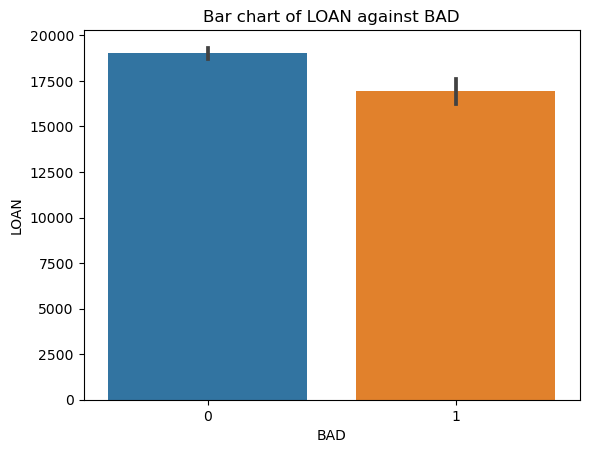

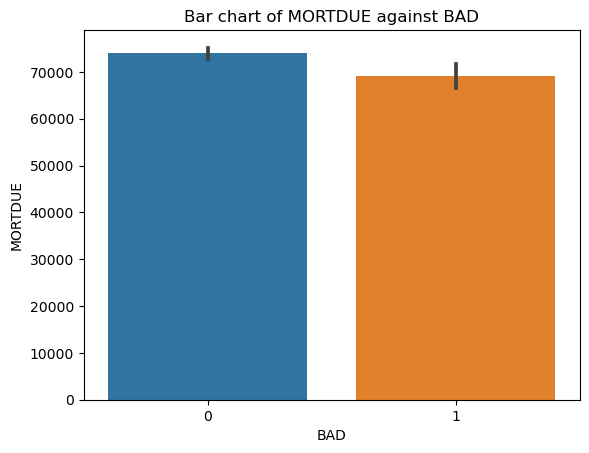

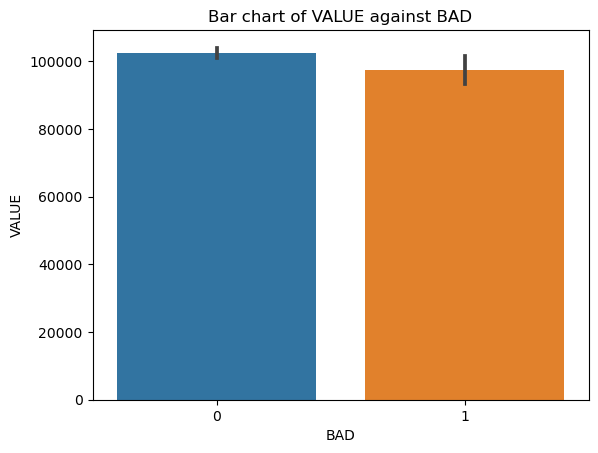

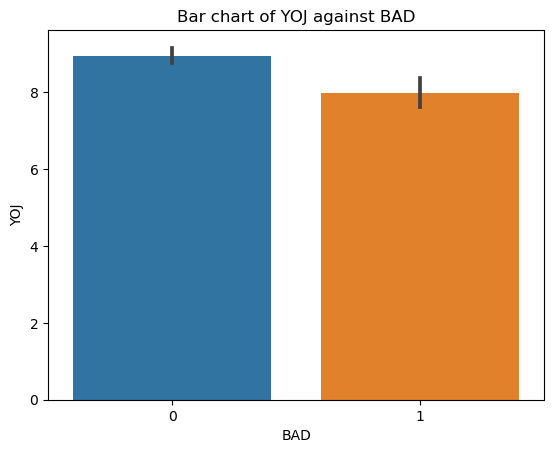

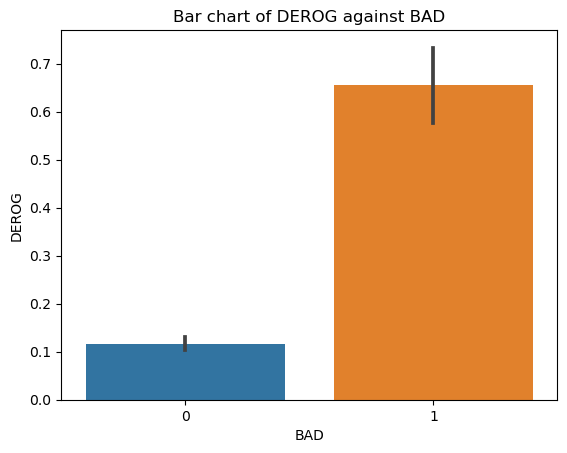

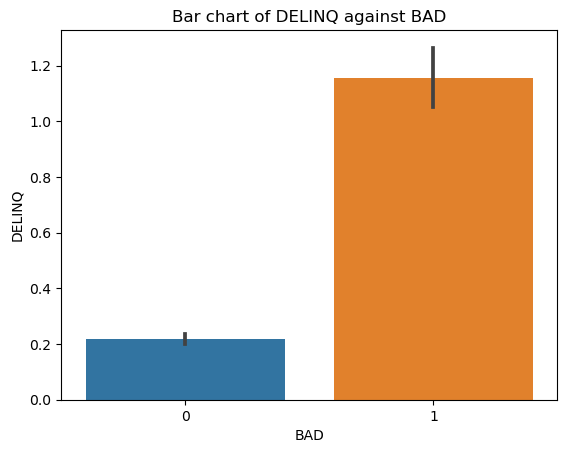

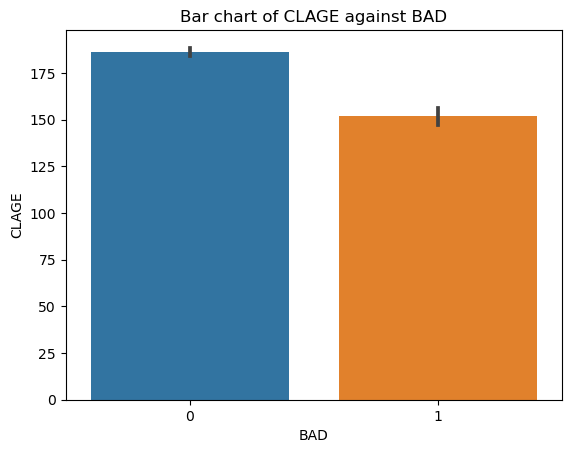

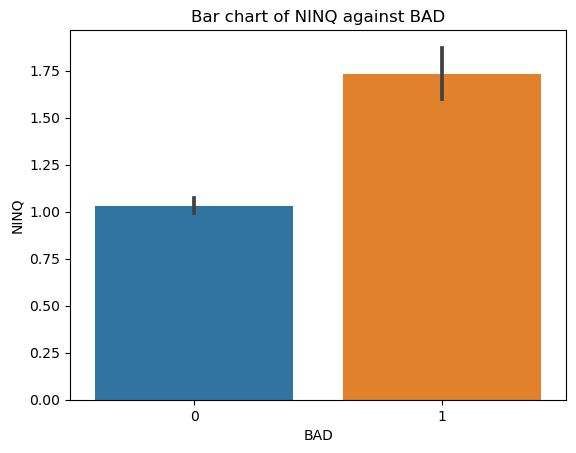

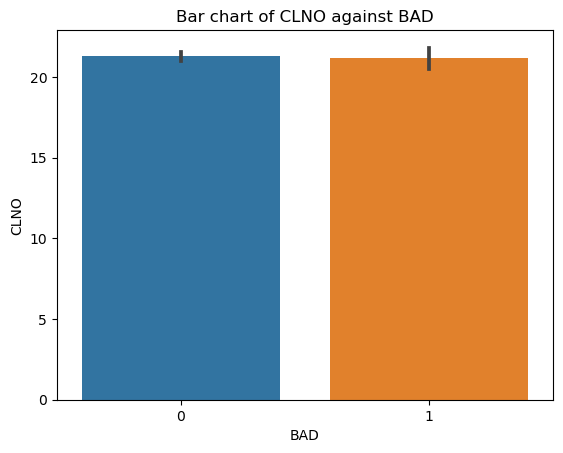

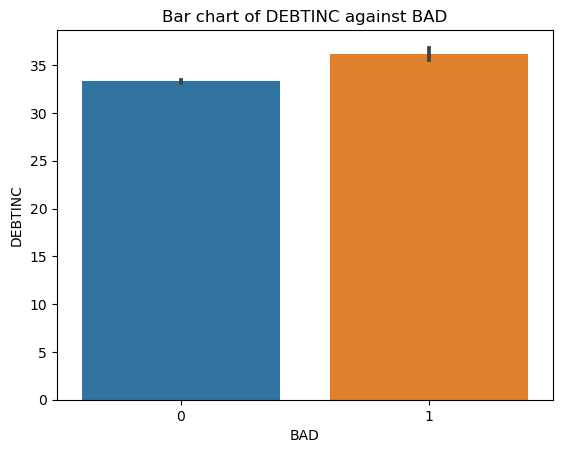

In [67]:

# Listing of variables to plot against 'BAD'
variables = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
'CLAGE','NINQ','CLNO','DEBTINC']

# Loop through the variables and create bar charts
for var in variables:
    sns.barplot(x='BAD', y=var, data = data)
    plt.title(f'Bar chart of {var} against BAD')
    plt.show()

Customers with lower loan amount, lowermortdue, lower property value, lower years on their job and lower age of oldest credit account are more likely to default.

Also customers with higher numbers of derogatory reports, higher numbers of delinquencies, higher number of debt ot income ratio accounts, and higher number of recent credit requests are more likely to default.

While there's no significance on the effect of total number of recent credit accounts owned.

**Visualizing categorical variables**

<Axes: xlabel='REASON', ylabel='count'>

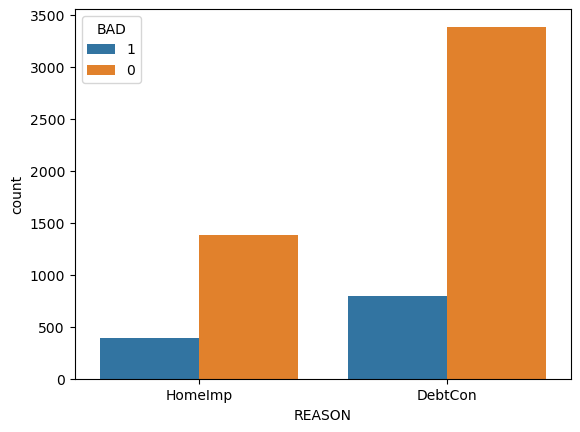

In [39]:
# Making a copy of the data
plot = data.copy()

# Converting BAD values to str
plot["BAD"] = plot.BAD.astype(str)

#Plotting bar chart for reason
sns.countplot(x = "REASON", hue = "BAD", data = plot)

The result of the data shows that those taking loans for debt consolidation are higher and have higher defaulters than those who take for home improvement purposes.

<Axes: xlabel='JOB', ylabel='count'>

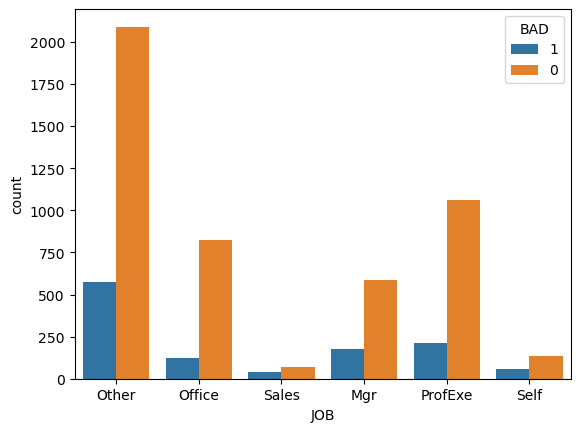

In [40]:
# Creating bar chat for Job
sns.countplot(x = "JOB", hue = "BAD", data = plot)

Like reason, the job type doesn't really show if customers will default. The higher a category, the higher the chances of having defaulters.

# Data preprocessing

In [41]:
# Displaying five random rows
data.sample(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2852,0,15900,79660.0,96393.0,DebtCon,Other,4.0,2.0,0.0,84.205779,1.0,21.0,22.113193
303,1,5900,106650.0,89235.5,DebtCon,Mgr,1.0,0.0,6.0,250.566667,4.0,23.0,38.570895
5384,1,31000,67794.0,103535.0,DebtCon,Mgr,7.0,0.0,1.0,116.898990,1.0,31.0,44.065429
770,0,8400,77144.0,91532.0,DebtCon,Mgr,19.0,0.0,1.0,311.757182,1.0,24.0,40.912737
1939,0,12700,105293.0,121416.0,DebtCon,Office,14.0,0.0,0.0,250.018881,0.0,16.0,35.287166


We got two categorical variables. We'll transform both first using one-hot encoding and check the result, then do same using binary encoding and label encoding.

In [42]:
df_hot = data.copy()

df_hot.head(2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366


In [43]:
df_hot.REASON.unique()

array(['HomeImp', 'DebtCon'], dtype=object)

**One hot encoding**

In [44]:
#Getting dummy variables
dummies = pd.get_dummies(df_hot[["REASON", "JOB"]], drop_first = True).astype("int")

#Merging dummy variables to original DataFrame
df_hot = pd.concat([df_hot, dummies], axis = 1)

#Displaying first two items
df_hot.head(2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366,1,0,1,0,0,0


In [45]:
# dropping Reason and Job columns
df_hot.drop(["REASON", "JOB"], axis=1, inplace = True)

df_hot.head(2)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366,1,0,1,0,0,0


In [46]:
# Splitting data into features and label
x = df_hot.drop("BAD", axis = 1) #Feautures
print("Feautures shape:", x.shape)

y = df_hot.BAD  # Label
print("Label shape:", y.shape)

Feautures shape: (5960, 16)
Label shape: (5960,)


In [47]:
# Scaling the data using two methods and checking each performance
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,MaxAbsScaler

# Creating an object of the scalers
std = StandardScaler()
robust = RobustScaler()

# Fit and transforming the scalers
x_std = pd.DataFrame(std.fit_transform(x), columns = x.columns)
x_robust = pd.DataFrame(robust.fit_transform(x), columns= x.columns)

# Converting to contigous numpy array for our knn model
x_std_knn = np.ascontiguousarray(x_std)
x_robust_knn = np.ascontiguousarray(x_robust)

In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Creating an object of the StratifiedKFold
sf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

#Creating a dictionary
def get_score(model, scaled_values, scores):
      cv_score = cross_val_score(model, scaled_values, y, cv = sf, scoring = scores)
      return cv_score.mean()

In [49]:
scaled_values = {"StandardScaler":[x_std, x_std_knn],
"RobustScaler":[x_robust, x_robust_knn]}

# Model list to loop through
models = [lg,nb,knn,svm,dt,rf,gb]

# Scores list to loop through
scores = ["accuracy", "precision", "recall", "f1"]

#List to store the results
results = []

# Running for loop
for model in models:
    if model == knn:
        for scaled_key, scaled_value in scaled_values.items():
            for score in scores:
                 model_score = get_score(model, scaled_value[1], score)
                 #Appending the results to a dictionary to the result list
                 results.append({
                        "Model":type(model).__name__,
                        "Scaling":scaled_key,
                        "Scoring Type": score,
                        "Score": model_score
})
    else:
        for scaled_key, scaled_value in scaled_values.items():
            for score in scores:
                 model_score = get_score(model, scaled_value[0], score)       
                 results.append({
                        "Model":type(model).__name__,
                        "Scaling":scaled_key,
                        "Scoring Type": score,
                        "Score": model_score
})


# Creating a DataFrame of the results
results_df = pd.DataFrame(results)

In [51]:
results_df

,Model,Scaling,Scoring Type,Score
0,LogisticRegression,StandardScaler,accuracy,0.838255
1,LogisticRegression,StandardScaler,precision,0.714539
2,LogisticRegression,StandardScaler,recall,0.316250
3,LogisticRegression,StandardScaler,f1,0.437497
4,LogisticRegression,RobustScaler,accuracy,0.838087
5,LogisticRegression,RobustScaler,precision,0.714639
6,LogisticRegression,RobustScaler,recall,0.314569
7,LogisticRegression,RobustScaler,f1,0.435894
8,GaussianNB,StandardScaler,accuracy,0.796980
9,GaussianNB,StandardScaler,precision,0.491289


**Accuracy** is generally high across all models. However, accuracy alone can be misleading, especially as the data is imbalanced.


**Precision** is high for models like SVC and KNeighborsClassifier, indicating a low false positive rate.


**Recall** is relatively low for LogisticRegression and SVC, suggesting that these models miss a significant number of positive cases.


**F1 score** is the harmonic mean of precision and recall, and it’s particularly low for LogisticRegression, indicating it’s not balancing the precision-recall trade -off as well as other models.

**Model Selection**: The RandomForestClassifier with StandardScaler scaling has the highest F1 score, creating a better balance between precision and recall. It also has a high accuracy score, precision score and highest recall score.


**Scaling**: There’s not a significant difference in performance between StandardScaler and RobustScaler for most models.

So, we'll try four more things.

1. Feature engineering: we'll try creating new features from existing ones to help models decision making.

2. Use SMOTE: Our data is imbalanced as we have more non defaulters than defaulters. So we'll use SMOTE to generate synthetic data for our minority class.

3. Adjust decision threshold: The decision threshold will be adjusted to balance precision and recall for our selected model so that the model can classify defaulters more accurately. The threshold will be validated using cross validation.

3. Hyper parameters tuning: The hyper parameters of the model will be tuned.

# Feature Engineering

**Checking Performance on StandardScaler and RobustScaler**

In [52]:
# Checking feature importance from the RandomForestClassifier with Standard scaling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2,stratify = y, shuffle = True, random_state = 42)

print("shape x_train:", x_train.shape)
print("shape x_test:", x_test.shape)
print("shape y_train:", y_train.shape)
print("shape y_test:", y_test.shape)

shape x_train: (4768, 16)
shape x_test: (1192, 16)
shape y_train: (4768,)
shape y_test: (1192,)


In [53]:
# Checking the feature importance score of the selected model
# Redefining the model and retraining the model
model_rf = RandomForestClassifier()

# Training the model
model_rf.fit(x_train, y_train)

# Getting feature importance scores
importance = model_rf.feature_importances_

# Creating a DataFrame to display feature importance
feature_df = pd.DataFrame({
    "features":x.columns,
    "importance": importance
})

# Sorting the DataFrame by importance in descending order
feature_df.sort_values(by = "importance", ascending=False, inplace = True)

# Displaying the feature importance
feature_df

,features,importance
9,DEBTINC,0.140502
6,CLAGE,0.113246
5,DELINQ,0.111331
0,LOAN,0.106896
2,VALUE,0.102968
1,MORTDUE,0.094063
8,CLNO,0.091802
3,YOJ,0.068831
4,DEROG,0.059030
7,NINQ,0.051773


The Reason and Job columns by far has the lowest importance score but won't be dropped. instead we'll  encode them using binary encoder while still maintaining their no order quality. Loan and Value has high scores they'd be combined to to create a new column called Loan to Value Ratio (LTV) which shows the percentage of property value that's being paid with loan.

In [54]:
df_1 = data.copy()

df_1.head(2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366


In [55]:
# Splitting data to features and label
x_s = df_1.drop("BAD", axis = 1) # Features
y_s = df_1.BAD

print("shape of x_s:", x_s.shape)
print("shape of y_s:", y_s.shape)

shape of x_s: (5960, 12)
shape of y_s: (5960,)


In [56]:
# Importing category_encoders
from category_encoders import BinaryEncoder

# Creating an object of the encoder
encoder = BinaryEncoder(cols = ["REASON", "JOB"])

# Fit_transforming the columns
x_s = encoder.fit_transform(x_s)

# Displaying first two items
x_s.head(2)

,LOAN,MORTDUE,VALUE,REASON_0,REASON_1,JOB_0,JOB_1,JOB_2,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0,39025.0,0,1,0,0,1,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921
1,1300,70053.0,68400.0,0,1,0,0,1,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366


In [57]:
# Creating Loan to Value column
x_s["LTV"] = (x_s.LOAN / x_s.VALUE)

x_s.head(2)

,LOAN,MORTDUE,VALUE,REASON_0,REASON_1,JOB_0,JOB_1,JOB_2,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LTV
0,1100,25860.0,39025.0,0,1,0,0,1,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921,0.028187
1,1300,70053.0,68400.0,0,1,0,0,1,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366,0.019006


# UpSampling

In [58]:
y_s.value_counts()

BAD
0    4771
1    1189
Name: count, dtype: int64

As seen above our label is imbalanced as our non-defaulters are more than the defaulters. We'll create a synthetic data using Smote to fill the minority set

In [59]:
# scaling the data
x_s_std = pd.DataFrame(std.fit_transform(x_s), columns = x_s.columns)
x_s_robust = pd.DataFrame(robust.fit_transform(x_s), columns= x_s.columns)

In [60]:
x_s_std.head(2)

,LOAN,MORTDUE,VALUE,REASON_0,REASON_1,JOB_0,JOB_1,JOB_2,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LTV
0,-1.562299,-1.107920,-1.099371,-1.532421,1.532421,-0.774874,-0.515163,0.686206,0.240237,-0.280976,-0.375943,-1.018026,-0.102879,-1.230878,-0.381593,-1.144779
1,-1.544453,-0.069286,-0.582794,-1.532421,1.532421,-0.774874,-0.515163,0.686206,-0.241936,-0.280976,1.477341,-0.689350,-0.707574,-0.728389,-0.141483,-1.200577


In [61]:
x_s_robust.head(2)

,LOAN,MORTDUE,VALUE,REASON_0,REASON_1,JOB_0,JOB_1,JOB_2,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LTV
0,-1.245902,-0.977478,-0.956113,-1.0,1.0,0.0,0.0,0.0,0.388889,0.0,0.0,-0.720587,0.0,-1.000000,-0.431877,-1.151851
1,-1.229508,0.125658,-0.396751,-1.0,1.0,0.0,0.0,0.0,0.000000,0.0,2.0,-0.470370,-0.5,-0.545455,-0.203239,-1.226167


In [64]:
# Splitting into training and testing test by Standard Scaling
X_std_train, X_std_test, Y_std_train, Y_std_test = train_test_split(x_s_std, y_s, test_size = 0.20, stratify = y_s, shuffle = True, random_state = 42)

print("X_std_train shape:", X_std_train.shape)
print("X_std_test shape:", X_std_test.shape)
print("Y_std_train shape:", Y_std_train.shape)
print("Y_std_test shape:", Y_std_test.shape)
print("===============================")

# Splitting into training and testing test by Robust Scaling
X_robust_train, X_robust_test, Y_robust_train, Y_robust_test = train_test_split(x_s_robust, y_s, test_size = 0.20, stratify = y_s, shuffle = True, random_state = 42)

print("X_robust_train shape:", X_robust_train.shape)
print("X_robust_test shape:", X_robust_test.shape)
print("Y_robust_train shape:", Y_robust_train.shape)
print("Y_robust_test shape:", Y_robust_test.shape)

X_std_train shape: (4768, 16)
X_std_test shape: (1192, 16)
Y_std_train shape: (4768,)
Y_std_test shape: (1192,)
X_robust_train shape: (4768, 16)
X_robust_test shape: (1192, 16)
Y_robust_train shape: (4768,)
Y_robust_test shape: (1192,)


**Upsampling and modelling using standard scaler**

In [65]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

#Creating an object of SMOTE
smote = SMOTE(random_state = 42)

#Applying smote to training set
X_std_train_smote, Y_std_train_smote = smote.fit_resample(X_std_train, Y_std_train)

In [66]:
print("Shape of X_std_train_smote:",X_std_train_smote.shape)
print("Shape of Y_std_train_smote:",Y_std_train_smote.shape)

Shape of X_std_train_smote: (7634, 16)
Shape of Y_std_train_smote: (7634,)


In [97]:
# Importing Model
from sklearn.ensemble import RandomForestClassifier

# creating an object of the model
model_std = RandomForestClassifier(random_state= 42)

# Training Model
model_std.fit(X_std_train_smote, Y_std_train_smote)

RandomForestClassifier(random_state=42)

Training Accuracy: 1.0
Accuracy Score: 0.9253355704697986
Precision Score: 0.8781725888324873
Recall Score: 0.726890756302521
F1 Score: 0.7954022988505747
Confusion matrix: [[930  24]
 [ 65 173]]


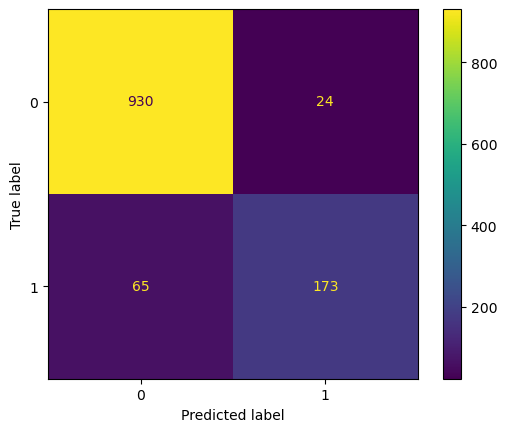

In [98]:
# Checking performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Y_pred = model_std.predict(X_std_test)

print("Training Accuracy:", model_std.score(X_std_train_smote, Y_std_train_smote))
print("Accuracy Score:", accuracy_score(Y_std_test, Y_pred))
print("Precision Score:", precision_score(Y_std_test, Y_pred))
print("Recall Score:", recall_score(Y_std_test, Y_pred))
print("F1 Score:", f1_score(Y_std_test, Y_pred))
print("Confusion matrix:", confusion_matrix(Y_std_test, Y_pred))
ConfusionMatrixDisplay(confusion_matrix(Y_std_test, Y_pred), display_labels=[0,1]).plot()

**Upsampling and modelling using robust scaler**

In [69]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

#Creating an object of SMOTE
smote = SMOTE(random_state = 42)

#Applying smote to training set
X_robust_train_smote, Y_robust_train_smote = smote.fit_resample(X_robust_train, Y_robust_train)

print("Shape of X_robust_train_smote:",X_robust_train_smote.shape)
print("Shape of Y_robust_train_smote:",Y_robust_train_smote.shape)

Shape of X_robust_train_smote: (7634, 16)
Shape of Y_robust_train_smote: (7634,)


In [99]:
# Importing Model
from sklearn.ensemble import RandomForestClassifier

# creating an object of the model
model_robust = RandomForestClassifier(random_state=42)

# Training Model
model_robust.fit(X_robust_train_smote, Y_robust_train_smote)

RandomForestClassifier(random_state=42)

Training Accuracy: 1.0
Accuracy Score: 0.9236577181208053
Precision Score: 0.8808290155440415
Recall Score: 0.7142857142857143
F1 Score: 0.7888631090487238
Confusion matrix: [[931  23]
 [ 68 170]]


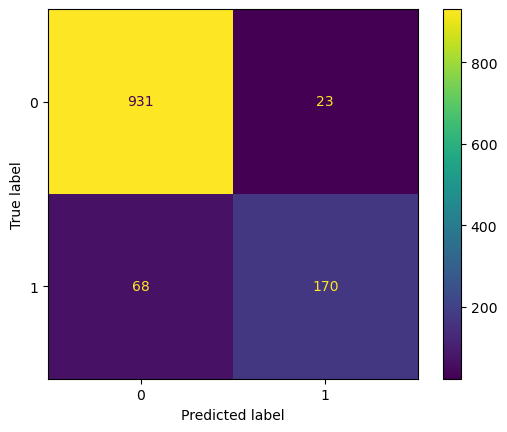

In [100]:
# Checking performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Y_pred = model_robust.predict(X_robust_test)

print("Training Accuracy:", model_robust.score(X_robust_train_smote, Y_robust_train_smote))
print("Accuracy Score:", accuracy_score(Y_robust_test, Y_pred))
print("Precision Score:", precision_score(Y_robust_test, Y_pred))
print("Recall Score:", recall_score(Y_robust_test, Y_pred))
print("F1 Score:", f1_score(Y_robust_test, Y_pred))
print("Confusion matrix:", confusion_matrix(Y_robust_test, Y_pred))
ConfusionMatrixDisplay(confusion_matrix(Y_robust_test, Y_pred), display_labels=[0,1]).plot()

After performing feature engineering and upsampling, the model still performed better with standard scaling.  

# Adjusting model decision threshold

**Adjusting model decision threshold for model with standard scaling**

In [101]:
# Getting probability scores
y_scores = model_std.predict_proba(X_std_test)[:,1]

y_scores

array([0.04, 0.01, 0.1 , ..., 0.08, 0.05, 0.02])

Best threshold: 0.38
Best f1_score: 38


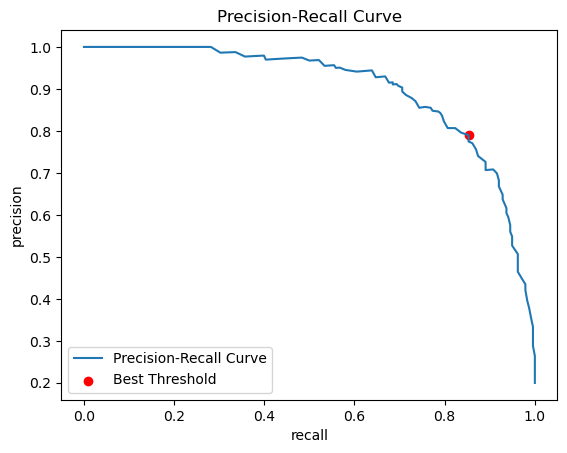

In [102]:
# Plotting precision-recall curve to see the best threshold
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(Y_std_test, y_scores)
# Calculating the f1_scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

#Finding the index of the highest f1_score
best_f1_index = np.argmax(f1_scores)
best_threshold = threshold[best_f1_index]

plt.figure()
plt.plot(recall, precision, label = "Precision-Recall Curve")
plt.scatter(recall[best_f1_index], precision[best_f1_index], color = "red", marker = "o", label = "Best Threshold")
plt.title("Precision-Recall Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()

print(f"Best threshold: {best_threshold}")
print(f"Best f1_score: {best_f1_index}")

Accuracy: 0.9253355704697986
Precision: 0.7898832684824902
Recall: 0.8529411764705882
F1 Score: 0.8202020202020202
Confusion Matrix:
[[900  54]
 [ 35 203]]


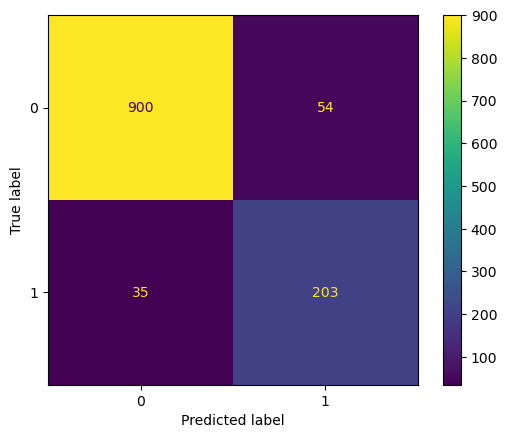

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Applying the new threshold to get the final predictions
threshold = 0.38
predictions = (y_scores >= threshold).astype(int)

# Calculating various performance metrics
accuracy = accuracy_score(Y_std_test, predictions)
precision = precision_score(Y_std_test, predictions)
recall = recall_score(Y_std_test, predictions)
f1 = f1_score(Y_std_test, predictions)
conf_matrix = confusion_matrix(Y_std_test, predictions)

# Printing the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
ConfusionMatrixDisplay(conf_matrix, display_labels=[0,1]).plot()

**Adjusting model decision threshold for model with robust scaling**

In [104]:
# Getting probability scores
y_scores = model_robust.predict_proba(X_robust_test)[:,1]

y_scores

array([0.02, 0.03, 0.07, ..., 0.05, 0.02, 0.  ])

Best threshold: 0.36
Best f1_score: 36


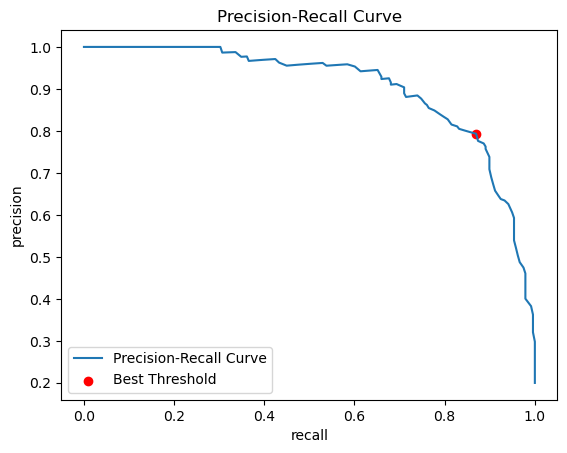

In [105]:
# Plotting precision-recall curve to see the best threshold
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(Y_robust_test, y_scores)
# Calculating the f1_scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

#Finding the index of the highest f1_score
best_f1_index = np.argmax(f1_scores)
best_threshold = threshold[best_f1_index]

plt.figure()
plt.plot(recall, precision, label = "Precision-Recall Curve")
plt.scatter(recall[best_f1_index], precision[best_f1_index], color = "red", marker = "o", label = "Best Threshold")
plt.title("Precision-Recall Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()

print(f"Best threshold: {best_threshold}")
print(f"Best f1_score: {best_f1_index}")

Accuracy: 0.9286912751677853
Precision: 0.7931034482758621
Recall: 0.8697478991596639
F1 Score: 0.8296593186372745
Confusion Matrix:
[[900  54]
 [ 31 207]]


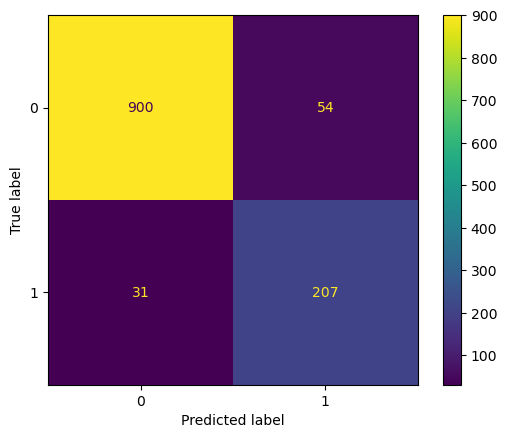

In [111]:
# Applying the new threshold to get the final predictions
threshold = 0.36
predictions = (y_scores >= threshold).astype(int)

# Calculating various performance metrics
accuracy = accuracy_score(Y_robust_test, predictions)
precision = precision_score(Y_robust_test, predictions)
recall = recall_score(Y_robust_test, predictions)
f1 = f1_score(Y_robust_test, predictions)
conf_matrix = confusion_matrix(Y_robust_test, predictions)

# Printing the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
ConfusionMatrixDisplay(conf_matrix, display_labels=[0,1]).plot()

As seen, adjusting the threshold has improved the accuracy score, decreased precision but increased Recall and F1 score for the robust scaled model, and the robust scaled model generalized better than the standard scaled data. As such, we'll proceed with the validation of the robust scaled threshold using cross validation. 

In [110]:
# Validating new threshold using cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Defining the threshold
threshold = 0.36

# Defining a custom scoring function that applies the threshold
def threshold_f1_scorer(y_true, y_scores):
    # Apply the threshold to the predicted probabilities to get the predictions
    y_pred = (y_scores >= threshold).astype(int)
    # Calculate the F1 score
    return f1_score(y_true, y_pred)

# Make a scorer from the custom scoring function
custom_scorer = make_scorer(threshold_f1_scorer, needs_proba=True)

# Perform cross-validation
sf = StratifiedKFold(n_splits=5, shuffle = True,random_state = 42)
cross_val_scores = cross_val_score(model_robust, x_s_robust, y_s, cv=sf, scoring=custom_scorer)

# Calculate the mean F1 score across all folds
mean_f1_score = cross_val_scores.mean()

# Print the mean F1 score
print(f"Mean F1 Score from Cross-Validation: {mean_f1_score:.4f}")

Mean F1 Score from Cross-Validation: 0.8316


The similarity between the F1 score after threshold adjustment and the average F1 score from cross-validation suggests that our model’s performance is stable across different data samples and the cross-validation process has validated that the threshold we’ve chosen is appropriate for our model. It’s not just a result of chance or specific to the data we initially tested on.

# Hyper parameters Tuning

In [112]:
model_robust.score(X_robust_test, Y_robust_test)

0.9236577181208053

In [150]:
model_new = RandomForestClassifier(
n_estimators = 100, max_features = 0.1)

model_new.fit(X_robust_train_smote, Y_robust_train_smote)

model_new.score(X_robust_test, Y_robust_test)

0.9429530201342282

After testing several parameters, n_estimators = 100, and max_features = 0.1 was found to significantly improve the model accuracy. This parameters will be used to check the model perfomance when threshold is adjusted. 

In [151]:
#Testing new hyper parameters
# Checking performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Y_pred = model_new.predict(X_robust_test)

print("Training Accuracy:", model_new.score(X_robust_train, Y_robust_train))
print("Accuracy Score:", accuracy_score(Y_robust_test, Y_pred))
print("Precision Score:", precision_score(Y_robust_test, Y_pred))
print("Recall Score:", recall_score(Y_robust_test, Y_pred))
print("F1 Score:", f1_score(Y_robust_test, Y_pred))
print("Confusion matrix:", confusion_matrix(Y_robust_test, Y_pred))

Training Accuracy: 1.0
Accuracy Score: 0.9429530201342282
Precision Score: 0.9619565217391305
Recall Score: 0.7436974789915967
F1 Score: 0.8388625592417063
Confusion matrix: [[947   7]
 [ 61 177]]


In [152]:
# Getting probability scores
y_scores = model_new.predict_proba(X_robust_test)[:,1]

y_scores

array([0.04, 0.05, 0.08, ..., 0.08, 0.03, 0.02])

Best threshold: 0.37
Best f1_score: 37


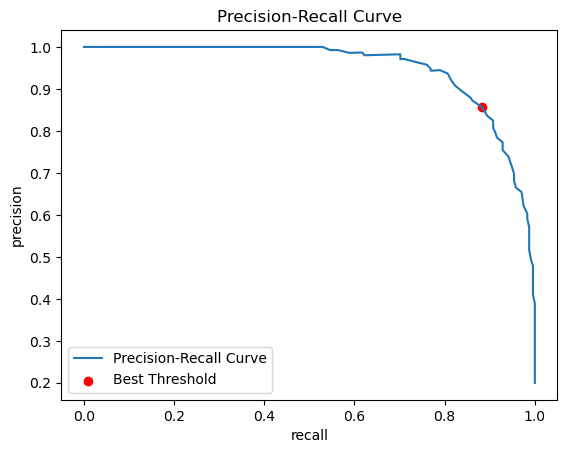

In [153]:
# Plotting precision-recall curve to see the best threshold
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(Y_robust_test, y_scores)
# Calculating the f1_scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

#Finding the index of the highest f1_score
best_f1_index = np.argmax(f1_scores)
best_threshold = threshold[best_f1_index]

plt.figure()
plt.plot(recall, precision, label = "Precision-Recall Curve")
plt.scatter(recall[best_f1_index], precision[best_f1_index], color = "red", marker = "o", label = "Best Threshold")
plt.title("Precision-Recall Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()

print(f"Best threshold: {best_threshold}")
print(f"Best f1_score: {best_f1_index}")

Accuracy: 0.9471476510067114
Precision: 0.8571428571428571
Recall: 0.8823529411764706
F1 Score: 0.8695652173913043
Confusion Matrix:
[[919  35]
 [ 28 210]]


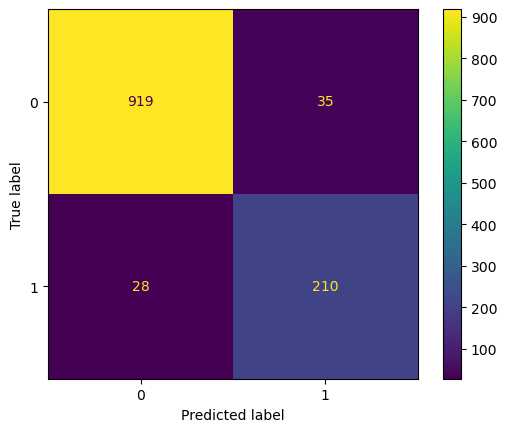

In [154]:
# Applying the new threshold to get the final predictions
threshold = 0.37
predictions = (y_scores >= threshold).astype(int)

# Calculate various performance metrics
accuracy = accuracy_score(Y_robust_test, predictions)
precision = precision_score(Y_robust_test, predictions)
recall = recall_score(Y_robust_test, predictions)
f1 = f1_score(Y_robust_test, predictions)
conf_matrix = confusion_matrix(Y_robust_test, predictions)

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
ConfusionMatrixDisplay(conf_matrix, display_labels=[0,1]).plot()

In [155]:
# Validating new threshold using cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Defining the threshold
threshold = 0.37

# Defining a custom scoring function that applies the threshold
def threshold_f1_scorer(y_true, y_scores):
    # Apply the threshold to the predicted probabilities to get the predictions
    y_pred = (y_scores >= threshold).astype(int)
    # Calculate the F1 score
    return f1_score(y_true, y_pred)

# Make a scorer from the custom scoring function
custom_scorer = make_scorer(threshold_f1_scorer, needs_proba=True)

# Perform cross-validation
sf = StratifiedKFold(n_splits=5, shuffle = True,random_state = 42)
cross_val_scores = cross_val_score(model_new, x_s_robust, y_s, cv=sf, scoring=custom_scorer)

# Calculate the mean F1 score across all folds
mean_f1_score = cross_val_scores.mean()

# Print the mean F1 score
print(f"Mean F1 Score from Cross-Validation: {mean_f1_score:.4f}")

Mean F1 Score from Cross-Validation: 0.8828


Again, the average F1 score after cross validation is similar to the adjusted threshold F1 score. Which makes our model suitable for use.

# MODEL DEPLOYMENT

We'll develop a function for all the processes we took to arrive at our best performance. This function will ensure that when new data is fed into the model, every preprocessing steps is applied as well. This function, the model, and the data will all be saved. 

In [156]:
deploy = data.copy()

deploy.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,30.532557
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,32.889545
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.665104


In [146]:
# Splitting data into features and label
x_deploy = deploy.drop(["BAD"], axis = 1) # Features
y_deploy = deploy.BAD

print("Shape x_deploy:", x_deploy.shape)
print("Shape y_deploy:", y_deploy.shape)

Shape x_deploy: (5960, 12)
Shape y_deploy: (5960,)


In [148]:
#Splitting into train and testing set
x_deploy_train, x_deploy_test, y_deploy_train, y_deploy_test = train_test_split(x_deploy, y_deploy, test_size = 0.2, stratify = y_deploy, shuffle = True, random_state = 42)

print("x_deploy_train shape:", x_deploy_train.shape)
print("x_deploy_test shape:", x_deploy_test.shape)
print("y_deploy_train shape:", y_deploy_train.shape)
print("y_deploy_test shape:", y_deploy_test.shape)

x_deploy_train shape: (4768, 12)
x_deploy_test shape: (1192, 12)
y_deploy_train shape: (4768,)
y_deploy_test shape: (1192,)


# Saving Model and function

In [151]:
# Importing pickle to use to save the model and data
import pickle as pk

# Dumping the cleaned data
pk.dump(data, open("loan_approval_data.pkl", "wb"))

# Dumping the model
pk.dump(model_new, open("loan_approval_model.pkl", "wb"))

In [152]:
# Checking if created
pk.load(open("loan_approval_data.pkl", "rb"))

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,30.914921
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,32.777366
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,30.532557
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,32.889545
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.665104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [166]:
# Saving the binary encoder
bin_en = data.drop("BAD", axis = 1)


encoder = BinaryEncoder(cols=['REASON', 'JOB'])
encoder.fit(bin_en)

pk.dump(encoder, open('binary_encoder.pkl', 'wb'))

In [175]:
# Saving the robust scaler
scaler = RobustScaler()
scaler.fit(x_s)

pk.dump(scaler, open('robust_scaler.pkl', 'wb'))

In [176]:
# Developing the function
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler

def preprocess_and_predict(input_data, trained_model, threshold=0.37):
    # Binary encoding
    encoder = pk.load(open("binary_encoder.pkl", "rb"))
    input_data_encoded = encoder.transform(input_data)

    # Feature engineering (add_combined_feature)
    input_data_encoded['LTV'] = input_data_encoded['LOAN'] / input_data_encoded['VALUE']

    # Scaling
    scaler = pk.load(open("robust_scaler.pkl", "rb"))
    input_data_scaled = pd.DataFrame(scaler.transform(input_data_encoded), columns = input_data_encoded.columns)

    # Adjust predictions based on the custom threshold
    predicted_probabilities = trained_model.predict_proba(input_data_scaled)[:, 1]
    adjusted_predictions = (predicted_probabilities >= threshold).astype(int)

    return adjusted_predictions

In [177]:
# Testing function
preprocess_and_predict(x_deploy_test, model_new)

array([0, 0, 0, ..., 0, 0, 0])

In [178]:
# Saving function
function_code = """
import pandas as pd
import pickle as pk

def preprocess_and_predict(input_data, trained_model, threshold=0.37):

    # Binary encoding
    encoder = pk.load(open("binary_encoder.pkl", "rb"))
    input_data_encoded = encoder.transform(input_data)

    # Feature engineering (add_combined_feature)
    input_data_encoded['LTV'] = input_data_encoded['LOAN'] / input_data_encoded['VALUE']

    # Scaling
    scaler = pk.load(open("robust_scaler.pkl", "rb"))
    input_data_scaled = pd.DataFrame(scaler.transform(input_data_encoded), columns = input_data_encoded.columns)

    # Loading our model
    trained_model = pk.load(open("loan_approval_model.pkl", "rb"))


    # Adjust predictions based on the custom threshold
    predicted_probabilities = trained_model.predict_proba(input_data_scaled)[:, 1]
    adjusted_predictions = (predicted_probabilities >= threshold).astype(int)

    return adjusted_predictions
"""

In [179]:
with open("loan_approval_function.py", "w") as f:
    f.write("# loan_approval_function.py\n\n")
    f.write(function_code)

# Print a success message
print("The function has been saved")

The function has been saved
